<a href="https://colab.research.google.com/github/tanviramtekee/project_sms_spam_detection/blob/main/project_sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("spam.csv")
df.head(5)


,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


DATA CLEANING


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['Category']=encoder.fit_transform(df['Category'])

In [ ]:
df.head()

,Category,Message,category,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [ ]:
df.duplicated().sum() #check duplicate value

0

In [ ]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5157, 3)

EDA


In [ ]:
df.head()

,Category,Message,category
0,not spam,"Go until jurong point, crazy.. Available only ...",0
1,not spam,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,not spam,U dun say so early hor... U c already then say...,0
4,not spam,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df['Category'].value_counts()

not spam    4516
spam         641
Name: Category, dtype: int64

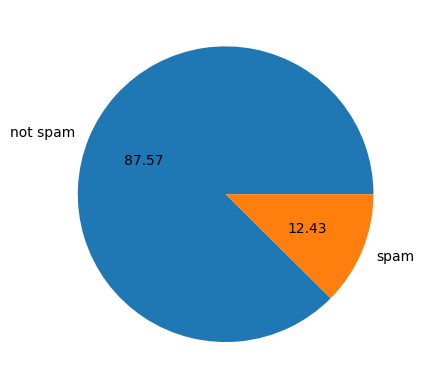

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['Message'].apply(len)

In [ ]:
df.head()

,Category,Message,category,num_characters
0,not spam,"Go until jurong point, crazy.. Available only ...",0,111
1,not spam,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,not spam,U dun say so early hor... U c already then say...,0,49
4,not spam,"Nah I don't think he goes to usf, he lives aro...",0,61


In [ ]:
#num of words
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Category,Message,category,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,0,Ok lar... Joking wif u oni...,0,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,0,U dun say so early hor... U c already then say...,0,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [ ]:
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Category,Message,category,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,0,Ok lar... Joking wif u oni...,0,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,0,U dun say so early hor... U c already then say...,0,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#describe function of  NOT SPAM

df[df['Category']==0] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#describe function of spam
df[df['Category']==1] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

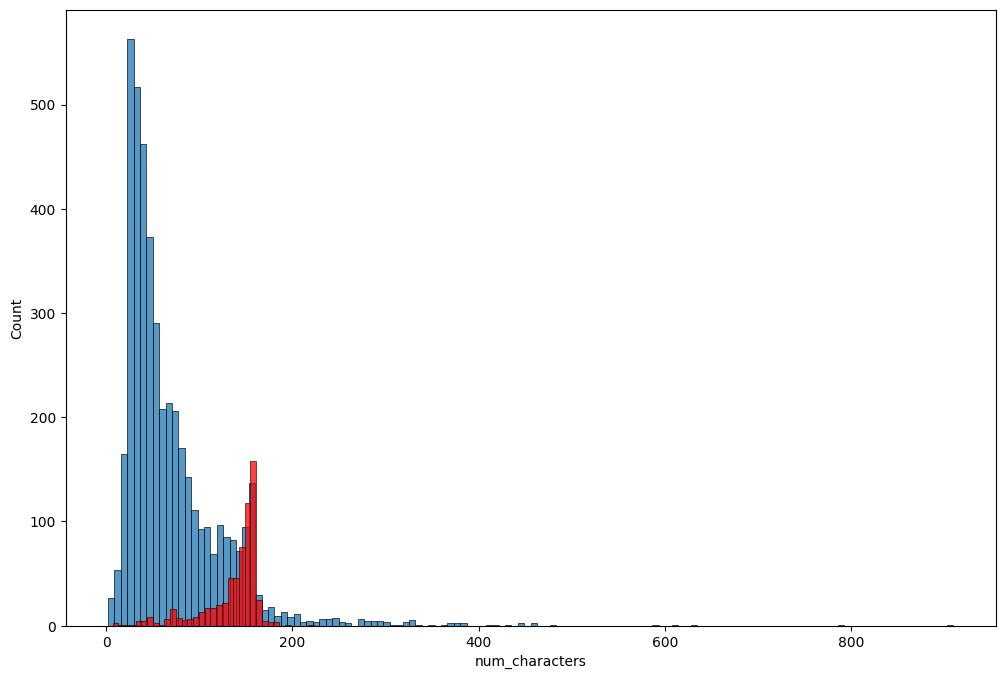

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

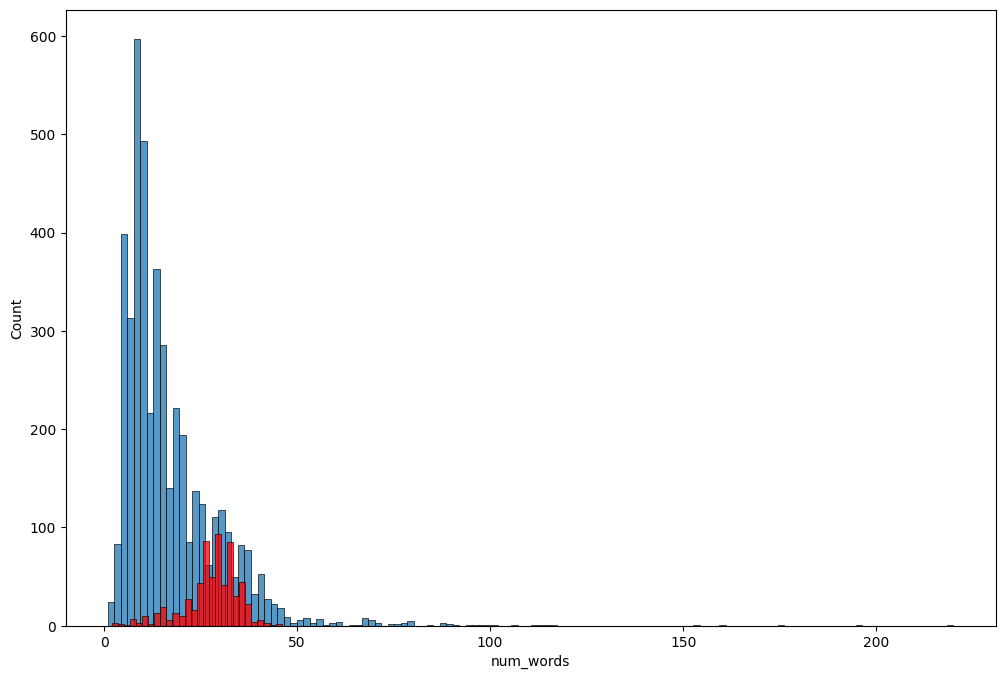

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Category']==0]['num_words'])
sns.histplot(df[df['Category']==1]['num_words'], color='red')

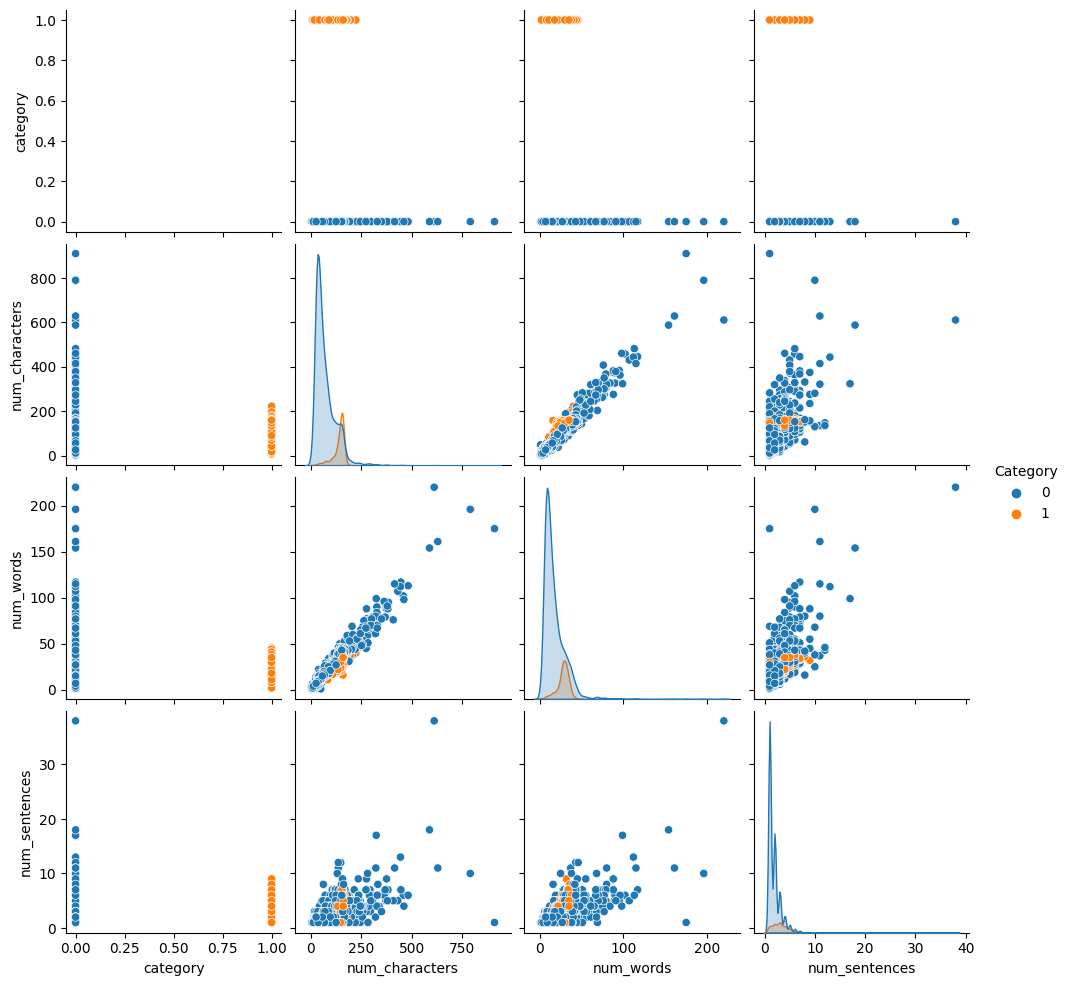

In [ ]:
sns.pairplot(df,hue='Category')

<ipython-input-129-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

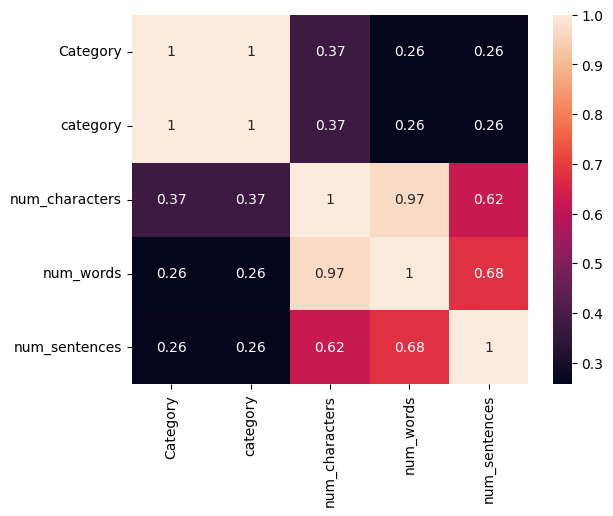

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#data preprocessing
#1 lower case
#2 tokenizeation
#3 removing special character
#4 removing stop words
#5 stemming (remove ing )

In [ ]:
def transform_text(text):
  text = text.lower()
  return text

In [ ]:
transform_text("HII HOW ARE YOY") # LOWERCASE

'hii how are yoy'

In [ ]:
transform_text("HII HOW ARE YOY ")# TOKENIZATION

'hii how are yoy '

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english' ):
        y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [ ]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

STOPWORDS


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
transform_text(" I loved to dancing . What about you & ")

'love danc'

In [ ]:
df['transform_text']=df['Message'].apply(transform_text)

In [ ]:
df.head()

,Category,Message,category,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [ ]:
from nltk.tokenize import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

WORD CLOUD


In [ ]:
from wordcloud import WordCloud

In [ ]:
spam_wc=wc=WordCloud(width=800,height=800,
             background_color="white",
             min_font_size=10)
spam_wc.generate(df[df['Category']==1]['transform_text'].str.cat(sep=" "))


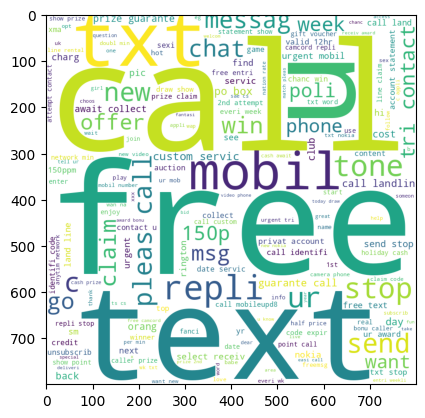

In [ ]:
plt.imshow(spam_wc)

In [ ]:
not_spam_wc=wc=WordCloud(width=800,height=800,
             background_color="white",
             min_font_size=10)
not_spam_wc.generate(df[df['Category']==0]['transform_text'].str.cat(sep=" "))


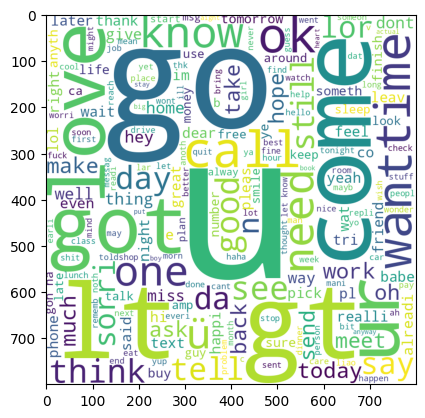

In [ ]:
plt.imshow(not_spam_wc)

In [ ]:
#FIND TOP 30 OR 40 WORDS IN SPAM OR NOT SPAM

In [ ]:
df.head()

,Category,Message,category,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus =[]
for msg in df[df['Category']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9781

In [ ]:
not_spam_corpus =[]
for msg in df[df['Category']==0]['transform_text'].tolist():
  for word in msg.split():
    not_spam_corpus.append(word)

In [ ]:
len(not_spam_corpus)

35940

model building

In [ ]:
#coverting text into vector using Bag of words


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv =CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x =tfidf.fit_transform(df['transform_text']).toarray()

In [ ]:
#appending the character col x
x= np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [ ]:
x.shape

(5157, 3001)

In [ ]:
y= df['Category'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(xtrain,ytrain)
y_pred1 = gnb.predict(xtest)
print(accuracy_score(ytest,y_pred1))
print(confusion_matrix(ytest,y_pred1))
print(precision_score(ytest,y_pred1))

0.8827519379844961
[[799 106]
 [ 15 112]]
0.5137614678899083


In [ ]:
mnb.fit(xtrain,ytrain)
y_pred2= mnb.predict(xtest)
print(accuracy_score(ytest,y_pred2))
print(confusion_matrix(ytest,y_pred2))
print(precision_score(ytest,y_pred2))

0.939922480620155
[[905   0]
 [ 62  65]]
1.0


In [ ]:
bnb.fit(xtrain,ytrain)
y_pred3 = bnb.predict(xtest)
print(accuracy_score(ytest,y_pred3))
print(confusion_matrix(ytest,y_pred3))
print(precision_score(ytest,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [ ]:
# we using mnb coz precision is good
#tfidf --> mnb

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))